# <center> PDL Lab19. Text Classification using Glove model </center>

### Arzoo Sah

### 205229103



### Imports

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk , os, zipfile
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN,LSTM,Bidirectional,Dropout,Conv1D,MaxPooling1D,Flatten,Activation
from nltk.corpus import stopwords
nltk.download('stopwords')
",".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### pre-processing the text

In [2]:
df = pd.read_csv('/content/glove-lab-dataset.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
y =df['category']
X=[]
for review in df['text']:
    filtered_sentence = [w.lower() for w in review.split() if not w in STOPWORDS]
    X.append(filtered_sentence)
X = pd.Series(X)  

In [4]:
label_tokenizer = Tokenizer()

#label_tokenizer_train.fit_on_texts(y_train)
label_tokenizer.fit_on_texts(y)

label_seq = np.array(label_tokenizer.texts_to_sequences(y))

In [5]:
vocab_size = 5000
embedding_dim = 64
max_length = 300
padding_type = 'post'
oov_tok = '<OOV>'

In [6]:
X_token = Tokenizer(num_words=5000,oov_token=oov_tok)
X_token.fit_on_texts(X)
word_index = X_token.word_index
X_sequence = X_token.texts_to_sequences(X)
dict(list(word_index.items())[0:20])

{'-': 3,
 '.': 16,
 '<OOV>': 1,
 'also': 6,
 'could': 11,
 'first': 15,
 'government': 18,
 'last': 14,
 'mr': 4,
 'new': 8,
 'one': 10,
 'people': 7,
 'said': 2,
 'said.': 12,
 'two': 17,
 'uk': 20,
 'us': 9,
 'world': 19,
 'would': 5,
 'year': 13}

In [7]:
X_padded = pad_sequences(X_sequence,maxlen=max_length,padding=padding_type)

In [8]:
print(label_seq.shape)
print(X_padded.shape)

(2225, 1)
(2225, 300)


### Dataset Preparation:

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_padded,label_seq,train_size=0.7)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1557, 300)
(668, 300)
(1557, 1)
(668, 1)


### LSTM Model Creation

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(embedding_dim))
model.add(Dense(embedding_dim, activation='relu'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 357,574
Trainable params: 357,574
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(X_train,y_train,epochs=20,verbose=2,validation_data=(X_test,y_test),batch_size=28)

Epoch 1/20
56/56 - 13s - loss: 1.6507 - accuracy: 0.2556 - val_loss: 1.6131 - val_accuracy: 0.2859
Epoch 2/20
56/56 - 10s - loss: 1.5720 - accuracy: 0.2768 - val_loss: 1.5918 - val_accuracy: 0.2395
Epoch 3/20
56/56 - 10s - loss: 1.5503 - accuracy: 0.2903 - val_loss: 1.5740 - val_accuracy: 0.2919
Epoch 4/20
56/56 - 10s - loss: 1.5133 - accuracy: 0.3070 - val_loss: 1.5202 - val_accuracy: 0.2934
Epoch 5/20
56/56 - 10s - loss: 1.4588 - accuracy: 0.3282 - val_loss: 1.4846 - val_accuracy: 0.3099
Epoch 6/20
56/56 - 10s - loss: 1.3899 - accuracy: 0.3764 - val_loss: 1.3877 - val_accuracy: 0.3683
Epoch 7/20
56/56 - 10s - loss: 1.3584 - accuracy: 0.3982 - val_loss: 1.2209 - val_accuracy: 0.3997
Epoch 8/20
56/56 - 10s - loss: 1.1261 - accuracy: 0.4644 - val_loss: 1.1507 - val_accuracy: 0.4042
Epoch 9/20
56/56 - 10s - loss: 1.0723 - accuracy: 0.4875 - val_loss: 1.2707 - val_accuracy: 0.4147
Epoch 10/20
56/56 - 10s - loss: 1.0761 - accuracy: 0.4830 - val_loss: 1.1108 - val_accuracy: 0.4207
Epoch 11/

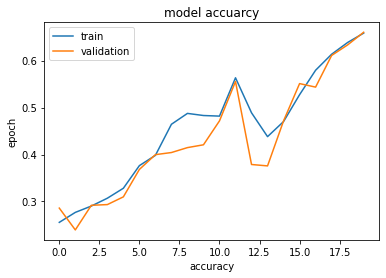

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuarcy')
plt.xlabel('accuracy')
plt.ylabel('epoch')

plt.legend(['train','validation'])
plt.show()

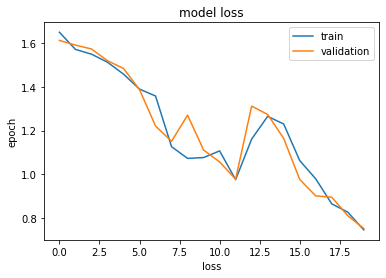

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')

plt.legend(['train','validation'])
plt.show()

In [16]:
score = model.evaluate(X_test,y_test,verbose=0)
print("loss:  ",score[0])
print("accuarcy:  ",score[1])

loss:   0.751132607460022
accuarcy:   0.660179615020752


### CNN-LSTM Model Creation

In [55]:
model1 = Sequential()

model1.add(Embedding(vocab_size, embedding_dim))
model1.add(Conv1D(filters=64,kernel_size=5,strides=1,activation='relu'))
model1.add(MaxPooling1D((2)))
model1.add(LSTM(embedding_dim))
model1.add(Dense(256,activation= 'relu'))
model1.add(Dense(6,activation='softmax'))

In [56]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 64)          20544     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 1542      
Total params: 391,750
Trainable params: 391,750
Non-trainable params: 0
________________________________________________

In [57]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [58]:
history1 = model1.fit(X_train,y_train,epochs=20,batch_size=28,validation_data=(X_test,y_test),verbose=2)

Epoch 1/20
64/64 - 11s - loss: 1.6157 - accuracy: 0.2483 - val_loss: 1.4668 - val_accuracy: 0.3528
Epoch 2/20
64/64 - 8s - loss: 1.4420 - accuracy: 0.3455 - val_loss: 1.6554 - val_accuracy: 0.3191
Epoch 3/20
64/64 - 8s - loss: 1.4690 - accuracy: 0.3197 - val_loss: 1.4836 - val_accuracy: 0.3618
Epoch 4/20
64/64 - 9s - loss: 1.3155 - accuracy: 0.3742 - val_loss: 1.3243 - val_accuracy: 0.4090
Epoch 5/20
64/64 - 8s - loss: 1.1820 - accuracy: 0.4382 - val_loss: 1.2565 - val_accuracy: 0.3303
Epoch 6/20
64/64 - 9s - loss: 1.0888 - accuracy: 0.4933 - val_loss: 1.1695 - val_accuracy: 0.3775
Epoch 7/20
64/64 - 8s - loss: 0.9277 - accuracy: 0.5910 - val_loss: 0.9916 - val_accuracy: 0.6135
Epoch 8/20
64/64 - 9s - loss: 0.7927 - accuracy: 0.6399 - val_loss: 0.9349 - val_accuracy: 0.5865
Epoch 9/20
64/64 - 9s - loss: 0.6219 - accuracy: 0.7567 - val_loss: 0.8363 - val_accuracy: 0.6966
Epoch 10/20
64/64 - 9s - loss: 0.4725 - accuracy: 0.8382 - val_loss: 0.8800 - val_accuracy: 0.6787
Epoch 11/20
64/64 

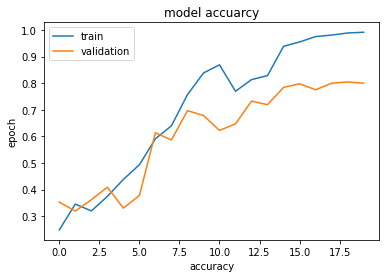

In [59]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

plt.title('model accuarcy')
plt.xlabel('accuracy')
plt.ylabel('epoch')

plt.legend(['train','validation'])
plt.show()

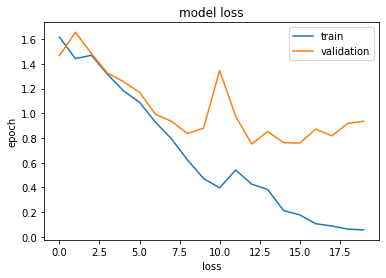

In [60]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')

plt.legend(['train','validation'])
plt.show()

In [61]:
score = model1.evaluate(X_test,y_test,verbose=0)
print("loss:  ",score[0])
print("accuracy:  ",score[1])

loss:   0.9361513257026672
accuracy:   0.800000011920929


**yes,performance of model1 (CNN-LSTM layer) is much better than model (LSTM layer)**

**acuuracy have been improved a lot**

### Pre-trained Model Creation

In [25]:
!wget --no-check-certificate \
     http://nlp.stanford.edu/data/glove.6B.zip \
     -O /tmp/glove.6B.zip

--2021-11-01 14:12:58--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-11-01 14:12:58--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-11-01 14:12:58--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’

/t

In [26]:
with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [27]:
embeddings_index = {}
f = open('/tmp/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [28]:
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [29]:
embedding_matrix.shape

(43624, 100)

In [30]:
embedding_layer = Embedding(input_dim=len(word_index) + 1,output_dim=100,weights=[embedding_matrix],input_length=100,trainable=False)

In [31]:
model2 = Sequential()

model2.add(embedding_layer)
model2.add(Conv1D(filters=64,kernel_size=3,strides=1,activation='relu'))
model2.add(MaxPooling1D((2)))
model2.add(LSTM(100))
model2.add(Dense(256,activation= 'tanh'))
model2.add(Dense(6,activation='softmax'))

In [32]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          4362400   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 64)            19264     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 1542      
Total params: 4,475,062
Trainable params: 112,662
Non-trainable params: 4,362,400
______________________________________

In [33]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
history2 = model2.fit(X_train,y_train,epochs=20,batch_size=28,validation_data=(X_test,y_test),verbose=2)

Epoch 1/20
56/56 - 11s - loss: 1.5174 - accuracy: 0.3430 - val_loss: 0.9645 - val_accuracy: 0.6407
Epoch 2/20
56/56 - 9s - loss: 1.2334 - accuracy: 0.5042 - val_loss: 1.5445 - val_accuracy: 0.3024
Epoch 3/20
56/56 - 9s - loss: 1.4616 - accuracy: 0.3333 - val_loss: 1.3198 - val_accuracy: 0.4222
Epoch 4/20
56/56 - 9s - loss: 1.0759 - accuracy: 0.5575 - val_loss: 0.9463 - val_accuracy: 0.6018
Epoch 5/20
56/56 - 9s - loss: 1.0050 - accuracy: 0.6179 - val_loss: 0.9303 - val_accuracy: 0.6287
Epoch 6/20
56/56 - 9s - loss: 0.7874 - accuracy: 0.7168 - val_loss: 0.8317 - val_accuracy: 0.6093
Epoch 7/20
56/56 - 9s - loss: 0.7863 - accuracy: 0.7007 - val_loss: 0.5834 - val_accuracy: 0.7769
Epoch 8/20
56/56 - 9s - loss: 0.7816 - accuracy: 0.7437 - val_loss: 0.7932 - val_accuracy: 0.6841
Epoch 9/20
56/56 - 9s - loss: 0.6601 - accuracy: 0.7701 - val_loss: 0.3310 - val_accuracy: 0.8847
Epoch 10/20
56/56 - 9s - loss: 0.4390 - accuracy: 0.8439 - val_loss: 0.2864 - val_accuracy: 0.9072
Epoch 11/20
56/56 

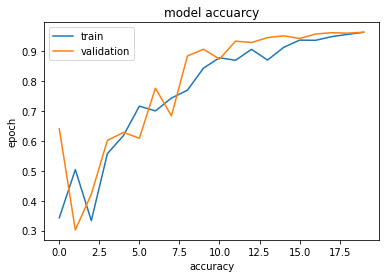

In [35]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.title('model accuarcy')
plt.xlabel('accuracy')
plt.ylabel('epoch')

plt.legend(['train','validation'])
plt.show()

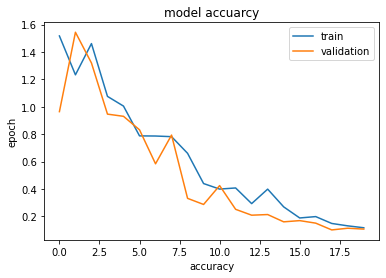

In [36]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

plt.title('model accuarcy')
plt.xlabel('accuracy')
plt.ylabel('epoch')

plt.legend(['train','validation'])
plt.show()

In [37]:
score = model2.evaluate(X_test,y_test,verbose=0)
print("loss:  ",score[0])
print("accuracy:  ",score[1])

loss:   0.10645467787981033
accuracy:   0.9640718698501587


### Improvements

**Try dropouts and see if you can improve the performance of your models.**


In [38]:
model3 = Sequential()

model3.add(Embedding(vocab_size, embedding_dim))
model3.add(Conv1D(filters=64,kernel_size=3,strides=1,activation='relu'))
model3.add(MaxPooling1D((2)))
model3.add(LSTM(embedding_dim))
model3.add(Dropout(0.25))
model3.add(Dense(512,activation= 'tanh'))
model3.add(Dense(6,activation='softmax'))

In [39]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_7 (Dense)              (None, 6)                

In [40]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
history3 = model3.fit(X_train,y_train,epochs=20,batch_size=28,validation_data=(X_test,y_test),verbose=2)

Epoch 1/20
56/56 - 9s - loss: 1.6272 - accuracy: 0.2434 - val_loss: 1.5859 - val_accuracy: 0.2784
Epoch 2/20
56/56 - 7s - loss: 1.5189 - accuracy: 0.2762 - val_loss: 1.2645 - val_accuracy: 0.3772
Epoch 3/20
56/56 - 7s - loss: 1.5499 - accuracy: 0.2864 - val_loss: 1.5347 - val_accuracy: 0.3009
Epoch 4/20
56/56 - 7s - loss: 1.4088 - accuracy: 0.3507 - val_loss: 1.1613 - val_accuracy: 0.3997
Epoch 5/20
56/56 - 7s - loss: 1.2492 - accuracy: 0.4053 - val_loss: 1.3017 - val_accuracy: 0.4177
Epoch 6/20
56/56 - 7s - loss: 1.3871 - accuracy: 0.3622 - val_loss: 1.3822 - val_accuracy: 0.4266
Epoch 7/20
56/56 - 7s - loss: 1.1685 - accuracy: 0.4361 - val_loss: 1.1132 - val_accuracy: 0.3772
Epoch 8/20
56/56 - 7s - loss: 1.0635 - accuracy: 0.4798 - val_loss: 1.0749 - val_accuracy: 0.4671
Epoch 9/20
56/56 - 7s - loss: 0.9739 - accuracy: 0.5010 - val_loss: 1.0741 - val_accuracy: 0.4566
Epoch 10/20
56/56 - 7s - loss: 0.9241 - accuracy: 0.5478 - val_loss: 1.0176 - val_accuracy: 0.5045
Epoch 11/20
56/56 -

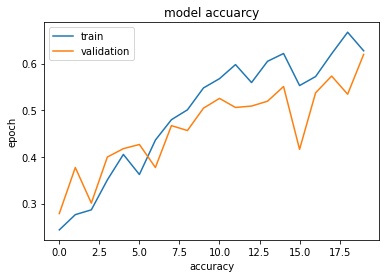

In [42]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

plt.title('model accuarcy')
plt.xlabel('accuracy')
plt.ylabel('epoch')

plt.legend(['train','validation'])
plt.show()

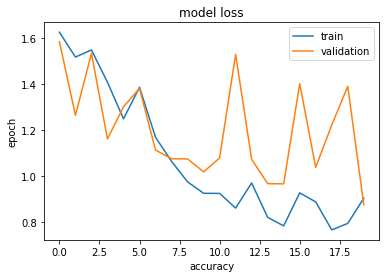

In [43]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

plt.title('model loss')
plt.xlabel('accuracy')
plt.ylabel('epoch')

plt.legend(['train','validation'])
plt.show()

In [65]:
score = model3.evaluate(X_test,y_test,verbose=0)
print("loss:  ",score[0])
print("accuracy:  ",score[1])

loss:   0.7705708146095276
accuracy:   0.680898904800415


**Split your dataset with 20% testing and observe your performance.**

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X_padded,label_seq,train_size=0.8)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1780, 300)
(445, 300)
(1780, 1)
(445, 1)


In [47]:
history4 = model2.fit(X_train,y_train,epochs=20,batch_size=28,validation_data=(X_test,y_test),verbose=2)

Epoch 1/20
64/64 - 10s - loss: 0.0993 - accuracy: 0.9691 - val_loss: 0.1483 - val_accuracy: 0.9573
Epoch 2/20
64/64 - 9s - loss: 0.0901 - accuracy: 0.9719 - val_loss: 0.1539 - val_accuracy: 0.9528
Epoch 3/20
64/64 - 9s - loss: 0.1039 - accuracy: 0.9702 - val_loss: 0.1173 - val_accuracy: 0.9528
Epoch 4/20
64/64 - 10s - loss: 0.0659 - accuracy: 0.9803 - val_loss: 0.1254 - val_accuracy: 0.9640
Epoch 5/20
64/64 - 9s - loss: 0.0688 - accuracy: 0.9809 - val_loss: 0.1130 - val_accuracy: 0.9618
Epoch 6/20
64/64 - 9s - loss: 0.0540 - accuracy: 0.9882 - val_loss: 0.1067 - val_accuracy: 0.9596
Epoch 7/20
64/64 - 9s - loss: 0.0445 - accuracy: 0.9871 - val_loss: 0.1083 - val_accuracy: 0.9618
Epoch 8/20
64/64 - 10s - loss: 0.0381 - accuracy: 0.9899 - val_loss: 0.1365 - val_accuracy: 0.9551
Epoch 9/20
64/64 - 9s - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.1198 - val_accuracy: 0.9618
Epoch 10/20
64/64 - 9s - loss: 0.0306 - accuracy: 0.9910 - val_loss: 0.1921 - val_accuracy: 0.9461
Epoch 11/20
64/6

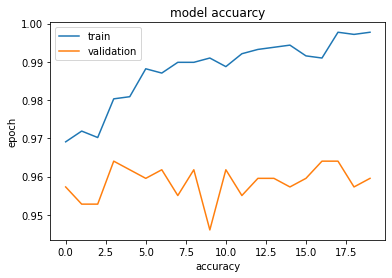

In [48]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])

plt.title('model accuarcy')
plt.xlabel('accuracy')
plt.ylabel('epoch')

plt.legend(['train','validation'])
plt.show()

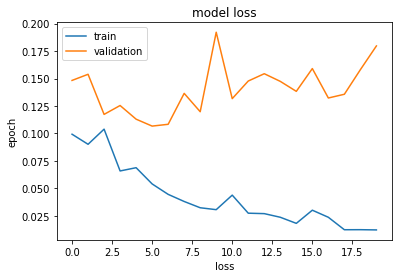

In [49]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])

plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')

plt.legend(['train','validation'])
plt.show()

In [50]:
score = model2.evaluate(X_test,y_test,verbose=0)
print("loss:  ",score[0])
print("accuracy:  ",score[1])

loss:   0.38132843375205994
accuracy:   0.8651685118675232


### Predictions

In [66]:
txt = ["Australia claimed the crucial wicket of Sri Lankan opener Pathum Nissanka as Pat Cummins struck early-on. Earlier, Australian captain Aaron Finch won the toss and decided to bowl vs Sri Lanka in a Super 12 game in the T20 World Cup 2021 at the Dubai International Stadium in Dubai. Sri Lanka made one change as Maheesh Theekshana was declared fit and came in place of Binura Fernando while Australia went unchanged from their last match. Australia defeated South Africa in their opening game by five wickets and two balls to spare. Sri Lanka, on the other hand, registered a win as well where they went past Bangladesh by five wickets and seven balls remaining.Dasun Shanaka will aim to grab a sensational win today in a tough group which promises to go down to the wire"]

tokenizer = Tokenizer(num_words=5000,oov_token='<oov>')
tokenizer.fit_on_texts(txt)
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=300)

pred = model1.predict(padded)

labels = ['tech','bussiness','politics','sport','entertainment']
print(pred)
print(labels[np.argmax(pred)])

[[3.8347442e-12 1.2873262e-08 4.1784998e-04 9.7730118e-01 2.2267254e-02
  1.3646622e-05]]
sport


In [67]:
txt = ["Australia claimed the crucial wicket of Sri Lankan opener Pathum Nissanka as Pat Cummins struck early-on. Earlier, Australian captain Aaron Finch won the toss and decided to bowl vs Sri Lanka in a Super 12 game in the T20 World Cup 2021 at the Dubai International Stadium in Dubai. Sri Lanka made one change as Maheesh Theekshana was declared fit and came in place of Binura Fernando while Australia went unchanged from their last match. Australia defeated South Africa in their opening game by five wickets and two balls to spare. Sri Lanka, on the other hand, registered a win as well where they went past Bangladesh by five wickets and seven balls remaining.Dasun Shanaka will aim to grab a sensational win today in a tough group which promises to go down to the wire"]

tokenizer = Tokenizer(num_words=5000,oov_token='<oov>')
tokenizer.fit_on_texts(txt)
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=300)

pred = model.predict(padded)

labels = ['tech','bussiness','politics','sport','entertainment']
print(pred)
print(labels[np.argmax(pred)])

[[2.0963211e-05 2.7913883e-02 1.1111324e-01 1.6829964e-02 6.7666662e-01
  1.6745523e-01]]
entertainment


In [68]:
txt = ["Australia claimed the crucial wicket of Sri Lankan opener Pathum Nissanka as Pat Cummins struck early-on. Earlier, Australian captain Aaron Finch won the toss and decided to bowl vs Sri Lanka in a Super 12 game in the T20 World Cup 2021 at the Dubai International Stadium in Dubai. Sri Lanka made one change as Maheesh Theekshana was declared fit and came in place of Binura Fernando while Australia went unchanged from their last match. Australia defeated South Africa in their opening game by five wickets and two balls to spare. Sri Lanka, on the other hand, registered a win as well where they went past Bangladesh by five wickets and seven balls remaining.Dasun Shanaka will aim to grab a sensational win today in a tough group which promises to go down to the wire"]

tokenizer = Tokenizer(num_words=5000,oov_token='<oov>')
tokenizer.fit_on_texts(txt)
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=300)

pred = model2.predict(padded)

labels = ['tech','bussiness','politics','sport','entertainment']
print(pred)
print(labels[np.argmax(pred)])

[[2.5487921e-04 7.8069051e-03 6.7549092e-03 9.8309225e-01 2.5859943e-05
  2.0651559e-03]]
sport


In [69]:
txt = ["Australia claimed the crucial wicket of Sri Lankan opener Pathum Nissanka as Pat Cummins struck early-on. Earlier, Australian captain Aaron Finch won the toss and decided to bowl vs Sri Lanka in a Super 12 game in the T20 World Cup 2021 at the Dubai International Stadium in Dubai. Sri Lanka made one change as Maheesh Theekshana was declared fit and came in place of Binura Fernando while Australia went unchanged from their last match. Australia defeated South Africa in their opening game by five wickets and two balls to spare. Sri Lanka, on the other hand, registered a win as well where they went past Bangladesh by five wickets and seven balls remaining.Dasun Shanaka will aim to grab a sensational win today in a tough group which promises to go down to the wire"]

tokenizer = Tokenizer(num_words=5000,oov_token='<oov>')
tokenizer.fit_on_texts(txt)
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=300)

pred = model.predict(padded)

labels = ['tech','bussiness','politics','sport','entertainment']
print(pred)
print(labels[np.argmax(pred)])

[[2.0963211e-05 2.7913883e-02 1.1111324e-01 1.6829964e-02 6.7666662e-01
  1.6745523e-01]]
entertainment
